In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
def save_notebook():
    return display(Javascript("IPython.notebook.save_notebook()"),
                   include=['application/javascript'])

def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [4]:
import sys, os
import warnings
sys.path.append('../')

from rankutils.mappings import ranking_type_map
from rankutils.cfgloader import cfgloader
from rankutils.evaluation import Evaluator
from rankutils.drawing import colors_from_cmap, irp_results_barh_draw, irp_results_pos_draw, rpp_results_draw

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
sns.set()

from tqdm import tqdm

import mpld3

In [5]:
pathcfg = cfgloader("/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/path_2.cfg")
evalcfgfile = "/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/evalcfg/0002.test_eval.cfg"
barfigsize=(20, 8)
linefigsize=(15, 15)
titleargs=dict(fontsize=10, horizontalalignment='center')

In [6]:
from tqdm import tqdm

evaluators = dict()

#keys = ['oxford_001', 'unicamp_001', 'places365_001', 'places365_002', 'places365_003',
#        'vggfaces_001', 'vggfaces_002', 'vggfaces_003', 'imagenet_001', 'imagenet_004',
#        'imagenet_003']

#keys = ['vggfaces_001', 'vggfaces_002', 'vggfaces_003',
#        'places365_001', 'places365_003', 'places365_002',
#        'imagenet_001', 'imagenet_004', 'imagenet_003']

keys = ['oxford_001', 'unicamp_001',
        'places365_001', 'imagenet_001',
        'vggfaces_001']

aliases = dict(oxford_001='OXF SURF-2000 Votes', unicamp_001='UNI SURF-2000 Votes',
               places365_001='P365 VGG16-L2Sq', places365_002='P365 R152-L2Sq',
               places365_003='P365 VGG16-Cos', vggfaces_001='VGGF VGG16-L2Sq',
               vggfaces_002='VGGF VGG16-L2Sq + Pert', vggfaces_003='VGGF VGG16-Cos',
               imagenet_001='INET Rv2-L2Sq', imagenet_004='INET Rv2-Canb',
               imagenet_003='INET Rv2-Cheb')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in tqdm(range(len(keys)), desc='Evaluating ', total=len(keys)):
        k = keys[i]
        evaluators[k] = Evaluator(evalcfgfile=evalcfgfile, key=k, pathcfg=pathcfg)
        evaluators[k].evaluate()

Evaluating : 100%|██████████| 5/5 [00:06<00:00,  1.50s/it]


# Positional nACC

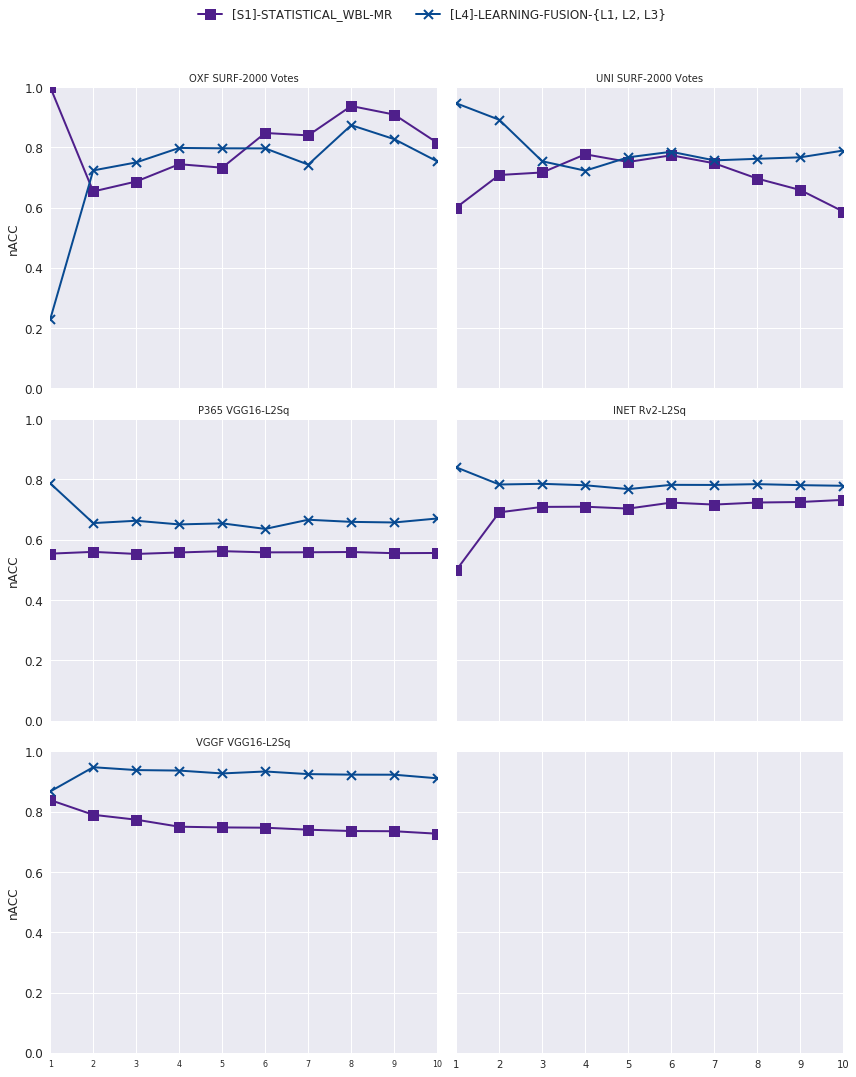

In [7]:
fig, axes = plt.subplots(3, 2, sharey=True, sharex=True)
axes = axes.reshape(-1)
fig.set_size_inches((12, 15))


for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]), fontdict=titleargs)
    
    
    if i%2 == 0:
        ylb = 'nACC'
    else:
        ylb = None
        
    if i == 9 or i == 10:
        xlb = 'Rank Position'
    else:
        xlb = None
    
    try:
        h, l = irp_results_pos_draw(evaluators[key].data, 10, ax=axes[i], measure='NACC', xlabel=xlb, ylabel=ylb)
        hand = h
        lab = l
    except:
        pass


    if i == len(keys)-1:
        fig.legend(hand, lab, fancybox=True, shadow=True, loc='upper center', bbox_to_anchor=[0.5, 1.0], ncol=2,
                  fontsize='large')
            

fig.tight_layout()
plt.subplots_adjust(top=0.92)
#plt.savefig('/home/alberto/Dropbox/ICASSP-2019_ML_Relevance_Prediction/tex/figures/ICASSP_2019_Pos-NACC.svg')

# Positional F1-Score - OFF

In [8]:
# fig, axes = plt.subplots(6, 2, sharey=True, sharex=True)
# axes = axes.reshape(-1)
# fig.set_size_inches((12, 24))

# for i, key in enumerate(keys):
#     axes[i].set_title("{0:s}".format(aliases[key]), fontdict=titleargs)
    
    
#     if i%2 == 0:
#         ylb = 'nACC'
#     else:
#         ylb = None
        
#     if i == 9 or i == 10:
#         xlb = 'Rank Position'
#     else:
#         xlb = None
    
#     try:
#         h, l = irp_results_pos_draw(evaluators[key].data, 10, ax=axes[i], measure='F-Score', xlabel=xlb, ylabel=ylb)
#         hand = h
#         lab = l
#     except:
#         pass
    
    
#     if i == len(keys)-1:
#         fig.legend(hand, lab, fancybox=True, shadow=True, loc='upper center', bbox_to_anchor=[0.5, 1.0], ncol=2,
#                   fontsize='large')

# fig.tight_layout()
# plt.subplots_adjust(top=0.92)
# #plt.savefig('/home/alberto/Dropbox/ICASSP-2019_ML_Relevance_Prediction/tex/figures/ICASSP_2019_Pos-Fscore.svg')

# MCC

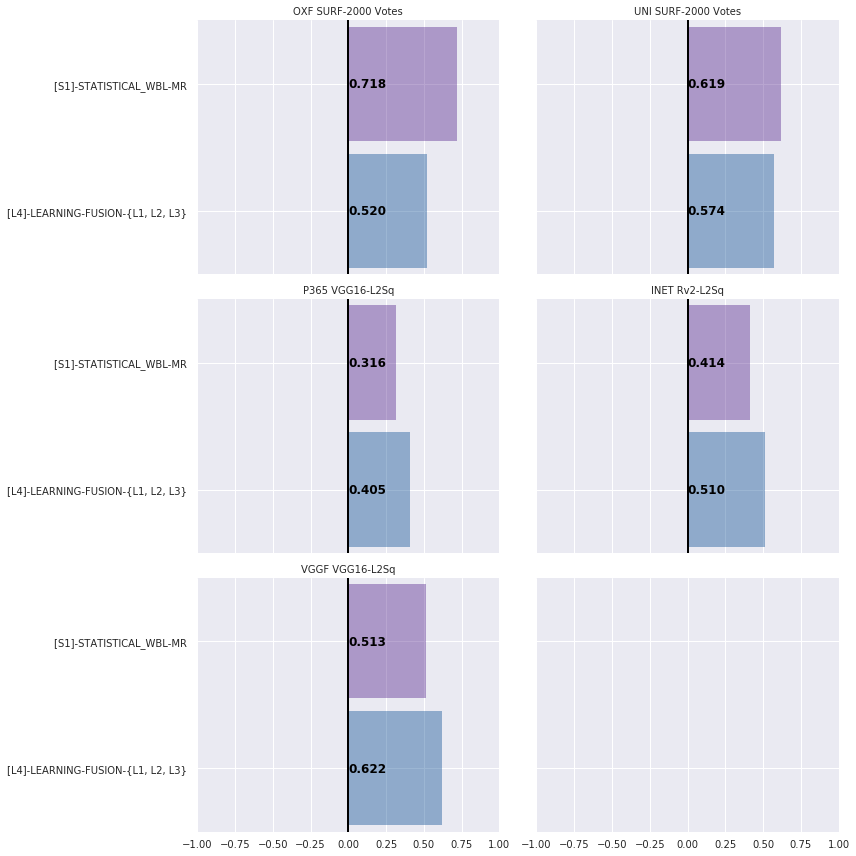

In [9]:
fig, axes = plt.subplots(3, 2, sharey=True, sharex=True)
axes = axes.reshape(-1)
fig.set_size_inches((12, 12))


for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]), fontdict=titleargs)
        
    if i == 9 or i == 10:
        xlb = 'MCC'
    else:
        xlb = None
    
    irp_results_barh_draw(evaluators[key].data, 'MCC', ax=axes[i], xlabel=xlb)
    
fig.tight_layout()